In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
from PIL import Image
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import string

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df=pd.read_csv('C:/Users/giulia macis/Desktop/UBISOFT/youtube_comments/youtube_comments_3McPLMk7DtU.csv')

In [4]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['make','made','even','never','always', 'playing','online','feel','play','im', 'com','net','org','io','govedume','need', 'finish', 'time','Mr','St','Mrs','Ms','Dr','play','really', 'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually','its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 'levels', 'update', 'patch', 'dev', 'games', 'game','continue', 'watch', 'harry', 'potter', 'way'])


In [5]:
def preprocess_text(text):
    if not isinstance(text, str):
        text = ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in custom_stopwords]
    tokens = [word for word in tokens if len(word)>=3]
    return ' '.join(tokens)
df['processed_comments'] = df['comment'].apply(preprocess_text)

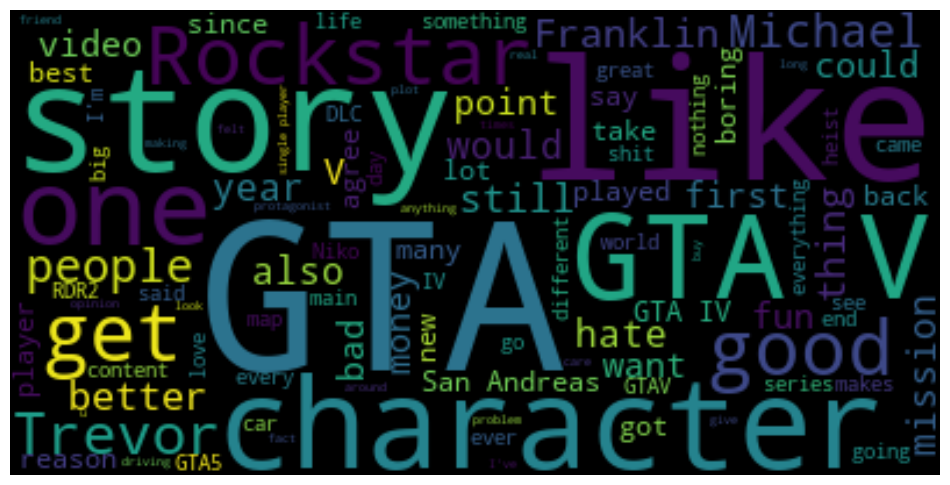

In [6]:
word_cloud_text = ' '.join(df['comment'].dropna())  # Drop any NaN values to avoid errors
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
##sentiment analysis
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df['sentiment'] = df['comment'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print('the video has mostly', most_common_sentiment, 'comments')
df.head()

the video has mostly positive comments


,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount,processed_comments,sentiment
0,https://www.youtube.com/watch?v=3McPLMk7DtU,How I Learned To Hate Grand Theft Auto V,2023-06-05T16:00:02Z,@TBP,"Okay, so apparently a lot of people don't know...",2024-06-16T09:55:53Z,22,196,okay apparently lot people address refer chara...,positive
1,https://www.youtube.com/watch?v=3McPLMk7DtU,How I Learned To Hate Grand Theft Auto V,2023-06-05T16:00:02Z,@Movieandgamefan100,Gta 5 is overrated Its not as entertaining fun...,2024-11-04T05:37:44Z,0,0,gta overrated entertaining funny quirky old on...,negative
2,https://www.youtube.com/watch?v=3McPLMk7DtU,How I Learned To Hate Grand Theft Auto V,2023-06-05T16:00:02Z,@kartikaytiwari7387,Just give me a gta SA 2 😢,2024-10-31T06:20:53Z,0,0,give gta,neutral
3,https://www.youtube.com/watch?v=3McPLMk7DtU,How I Learned To Hate Grand Theft Auto V,2023-06-05T16:00:02Z,@bladerunnervii4835,Just finished it. What a boring slog.,2024-10-29T07:33:29Z,0,0,finished boring slog,negative
4,https://www.youtube.com/watch?v=3McPLMk7DtU,How I Learned To Hate Grand Theft Auto V,2023-06-05T16:00:02Z,@togetheras172,i have not played GTA 5 since 2014 on my ps3.,2024-10-25T23:06:54Z,0,0,played gta since 2014 ps3,negative


In [8]:
data = df['processed_comments'].values.tolist()
def text_processing(texts):
    #Remove numbers and alphanumerical words we don't need
    texts =  [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    #Tokenize & lowercase each word
    texts = [[word for word in text.lower().split()] for text in texts]
    #Stem each word
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text] for text in texts]
    #Remove stopwords
    texts = [[word for word in text if word not in custom_stopwords] for text in texts]
    #Remove short words less than 3 letters in length
    texts = [[word for word in tokens if len(word) >= 3] for tokens in texts]
    return texts
data = text_processing(data)
#dictionary = Dictionary(data)
# Convert corpus to bag-of-words format
#corpus = [dictionary.doc2bow(text) for text in data]
# Apply TF-IDF to the bag-of-words corpus
#tfidf = TfidfModel(corpus)
#corpus_tfidf = tfidf[corpus]

#----------------------------------------------------------------------------------------------------------------------------

In [10]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
data = df['processed_comments'].values.tolist()
# Example: data should be a list of tokenized comments (lists of words)
bigram = Phrases(data, min_count=5, threshold=100)  # Higher threshold means fewer phrases
trigram = Phrases(bigram[data], threshold=100)
# Convert Phrases models to Phrasers for efficiency
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

In [11]:
# Function to create bigrams and trigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Apply bigrams and trigrams
data_bigrams = make_bigrams(data)
data_trigrams = make_trigrams(data_bigrams)

In [12]:
from gensim.corpora import Dictionary

# Create dictionary and corpus using the bigram/trigram data
dictionary = Dictionary(data_trigrams)
corpus = [dictionary.doc2bow(text) for text in data_trigrams]


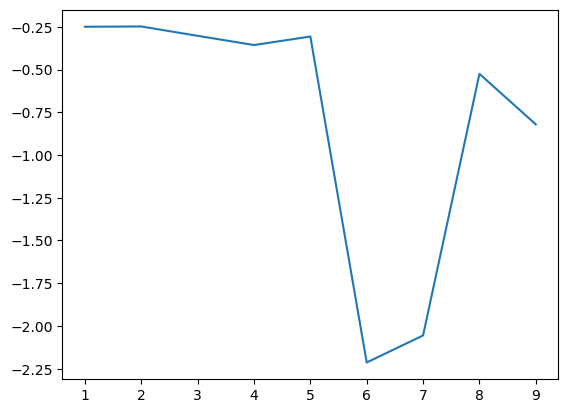

In [13]:
np.random.seed(1)
k_range = range(1,10)
scores = []
for k in k_range:
    LdaModel = ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = k, passes = 20)
    cm = CoherenceModel(model= LdaModel, corpus = corpus, dictionary = dictionary, coherence = 'u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.show()

In [14]:
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word = dictionary, num_topics = 4, passes = 20)
print(model.show_topics())

NameError: name 'corpus_tfidf' is not defined